In [8]:

# Load your dataset
df = pd.read_csv('exported_data_biased.csv', index_col = 'Unnamed: 0')

# 1. Data Preprocessing: Ensure all columns are in the correct format
df['Energy Score'] = df['Energy Score'].apply(pd.to_numeric, errors='coerce')
df['Recovery Score'] = df['Recovery Score'].apply(pd.to_numeric, errors='coerce')

# 2. Define the predictors for the logistic regression model
predictors = [
    'session_rpe_SUM_07_days', 'session_rpe_SUM_28_days', 'session_rpe_AC07_28_days',
    'session_rpe_MON_28_days', 'session_rpe_STR_28_days', 'Energy Score', 'Recovery Score',
    'Mood Score', 'Sleep Quality Score'
]


df['to_be_injured'] = np.nan
df.loc[(df["injury_onset"] == 1), 'to_be_injured'] = True
df.loc[(df["injury_onset"] == 0)&(df['currently_injured'] == False)&(df['upcoming_injury_within_28_days'] == False), 'to_be_injured'] = False
df['to_be_injured'].value_counts()

C:\Users\rmeer\AppData\Local\Temp\ipykernel_7480\2711894304.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df["injury_onset"] == 1), 'to_be_injured'] = True


to_be_injured
False    5835
True       91
Name: count, dtype: int64

         Current function value: 0.000014
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2087
Model:                          Logit   Df Residuals:                     2077
Method:                           MLE   Df Model:                            9
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                     inf
Time:                        15:42:12   Log-Likelihood:              -0.028993
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5517    143.711     -0.046      0.964    -288.221     275.117
x1             0.0007      0.051      0.014      0.989      -0.09

C:\Users\rmeer\AppData\Local\Temp\ipykernel_7480\3631092324.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df["injury_onset"] == 1), 'to_be_injured'] = True
C:\Users\rmeer\AppData\Local\Temp\ipykernel_7480\3631092324.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['to_be_injured'] = df_filtered['to_be_injured'].astype(int)
C:\Users\rmeer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect sep

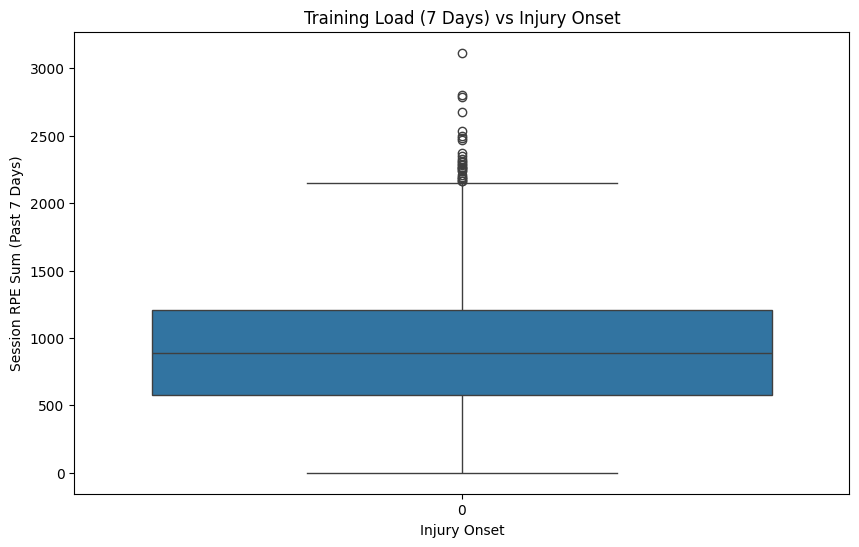

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('exported_data_biased.csv', index_col = 'Unnamed: 0')

# 1. Data Preprocessing: Ensure all columns are in the correct format
df['Energy Score'] = df['Energy Score'].apply(pd.to_numeric, errors='coerce')
df['Recovery Score'] = df['Recovery Score'].apply(pd.to_numeric, errors='coerce')

# 2. Define the predictors for the logistic regression model
predictors = [
    'session_rpe_SUM_07_days', 'session_rpe_SUM_28_days', 'session_rpe_AC07_28_days',
    'session_rpe_MON_28_days', 'session_rpe_STR_28_days', 'Energy Score', 'Recovery Score',
    'Mood Score', 'Sleep Quality Score'
]

df['to_be_injured'] = np.nan
df.loc[(df["injury_onset"] == 1), 'to_be_injured'] = True
df.loc[(df["injury_onset"] == 0)&(df['currently_injured'] == False)&(df['upcoming_injury_within_28_days'] == False), 'to_be_injured'] = False
df_filtered = df[df['to_be_injured'].notnull()]
# df_filtered = df_filtered.dropna(subset=predictors + ['to_be_injured'])

df_filtered['to_be_injured'] = df_filtered['to_be_injured'].astype(int)

df_filtered = df_filtered.dropna(subset=predictors + ['to_be_injured'])

# Prepare the features and target variable
X = df_filtered[predictors].to_numpy()
y = df_filtered['to_be_injured'].to_numpy()

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# 3. Logistic Regression Model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the model summary
print(result.summary())

# 4. Visualizing Relationships

# Training Load vs Injury Onset (7 days summary)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['to_be_injured'], y=df_filtered['session_rpe_SUM_07_days'])
plt.xlabel('Injury Onset')
plt.ylabel('Session RPE Sum (Past 7 Days)')
plt.title('Training Load (7 Days) vs Injury Onset')
plt.show()

# # Wellness Scores vs Injury Onset
# wellness_cols = ['Energy Score', 'Recovery Score', 'Mood Score', 'Sleep Quality Score']
# for col in wellness_cols:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df_filtered['to_be_injured'], y=df_filtered[col])
#     plt.xlabel('Injury Onset')
#     plt.ylabel(f'{col}')
#     plt.title(f'{col} vs Injury Onset')
#     plt.show()

# # 5. Correlation Analysis between Wellness Scores and Training Load
# correlation_matrix = df_filtered[['session_rpe_SUM_07_days', 'session_rpe_SUM_28_days', 'session_rpe_AC07_28_days'] + wellness_cols].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Between Wellness Scores and Training Load Metrics')
# plt.show()
